##### 위험 상황(낙상, 화재)을 감지하기 위해 GRU 모델 사용

### 1. 데이터 준비
#### a. 데이터 수집 (낙상 데이터)

In [5]:
##########################
## Mediapipe Pose Point ##
##########################

import os
import cv2
import mediapipe as mp
import concurrent.futures

# Mediapipe 포즈 초기화
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

def process_and_display_pose(image_path, pose, pointer_color=(0, 0, 255), pointer_thickness=10):
    raw_img = cv2.imread(image_path)
    if raw_img is None:
        raise FileNotFoundError(f"이미지를 찾을 수 없습니다: {image_path}")

    image = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    if results.pose_landmarks:
        for idx in range(33):
            landmark = results.pose_landmarks.landmark[idx]
            x = int(landmark.x * raw_img.shape[1])
            y = int(landmark.y * raw_img.shape[0])
            cv2.circle(raw_img, (x, y), pointer_thickness, pointer_color, -1)

    # 크기 조정
    height, width = raw_img.shape[:2]
    resize_factor = 0.5
    small_img = cv2.resize(raw_img, (int(width * resize_factor), int(height * resize_factor)))

    return small_img

def save_image(path, image):
    cv2.imwrite(path, image, [int(cv2.IMWRITE_JPEG_QUALITY), 90])

# 이미지 디렉토리 경로 설정
base_Y_path = "../data/Emergency_Data/Validation/Raw_Data/image/Y/"
base_N_path = "../data/Emergency_Data/Validation/Raw_Data/image/N/"
Y_file_tag = ["BY/", "FY/", "SY/"]
N_file_tag = ["N/"]

executor = concurrent.futures.ThreadPoolExecutor()
for tag in N_file_tag:
    file_dir = os.path.join(base_N_path, tag)
    file_list = sorted(os.listdir(file_dir))

    for each_file in file_list:
        img_dir = os.path.join(file_dir, each_file)
        each_img = sorted(os.listdir(img_dir))

        for idx in each_img:
            total_img_path = os.path.join(img_dir, idx)

            try:
                processed_img = process_and_display_pose(total_img_path, pose)
                save_path = "/home/cho/NAHONLAB_data/normal_state_data/"
                os.makedirs(save_path, exist_ok=True)
                save_img_path = os.path.join(save_path, os.path.basename(total_img_path))
                executor.submit(save_image, save_img_path, processed_img)
            except Exception as e:
                print(f"Error processing {total_img_path}: {e}")

        print(f"####### {each_file} file process complete! #######")
executor.shutdown()


I0000 00:00:1733987112.382496    4212 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1733987112.383486   69124 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1733987112.471883   69111 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1733987112.502637   69118 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


####### 00005_H_A_N_C1 file process complete! #######
####### 00005_H_A_N_C2 file process complete! #######
####### 00005_H_A_N_C3 file process complete! #######
####### 00005_H_A_N_C4 file process complete! #######
####### 00005_H_A_N_C5 file process complete! #######
####### 00005_H_A_N_C6 file process complete! #######
####### 00005_H_A_N_C7 file process complete! #######
####### 00005_H_A_N_C8 file process complete! #######
####### 00023_H_A_N_C1 file process complete! #######
####### 00023_H_A_N_C2 file process complete! #######
####### 00023_H_A_N_C3 file process complete! #######
####### 00023_H_A_N_C4 file process complete! #######
####### 00023_H_A_N_C5 file process complete! #######
####### 00023_H_A_N_C6 file process complete! #######
####### 00023_H_A_N_C7 file process complete! #######
####### 00023_H_A_N_C8 file process complete! #######
####### 00095_H_A_N_C1 file process complete! #######
####### 00095_H_A_N_C2 file process complete! #######
####### 00095_H_A_N_C3 file 

In [9]:
import os

def count_images_in_directory(directory):
    # 이미지 파일 확장자를 정의
    image_extensions = {'.jpg'}
    count = 0

    try:
        # 디렉토리 내 파일 확인
        for file in os.listdir(directory):
            # 파일 확장자를 확인하고 이미지 파일만 카운트
            if os.path.splitext(file)[1].lower() in image_extensions:
                count += 1
    except FileNotFoundError:
        print(f"Error: Directory '{directory}' not found.")
    except Exception as e:
        print(f"Error: {e}")

    return count

if __name__ == "__main__":
    base_path = "/home/cho/NAHONLAB_data"  # NAHONLAB_data 디렉토리 경로
    falling_data_path = os.path.join(base_path, "falling_data")
    normal_state_data_path = os.path.join(base_path, "normal_state_data")

    # 각각의 디렉토리에서 이미지 파일 개수 확인
    falling_count = count_images_in_directory(falling_data_path)
    normal_state_count = count_images_in_directory(normal_state_data_path)

    print(f"Number of images in 'falling_data': {falling_count} 개")
    print(f"Number of images in 'normal_state_data': {normal_state_count} 개")


Number of images in 'falling_data': 17040 개
Number of images in 'normal_state_data': 5680 개


#### b. 라벨링
- 데이터를 정상 상태(0)와 위험 상태(1)로 라벨링.
- 낙상 데이터: 0 = 정상, 1 = 낙상

In [10]:
import os
import numpy as np
from PIL import Image

def load_and_label_images(directory, label, image_size=(64, 64)):
    """
    디렉토리에서 이미지를 로드하고 라벨링합니다.

    Args:
        directory (str): 이미지 파일이 저장된 디렉토리 경로.
        label (int): 해당 디렉토리의 라벨 (예: 0 또는 1).
        image_size (tuple): 이미지를 리사이즈할 크기 (기본값: 64x64).

    Returns:
        images (list): 이미지 데이터 리스트.
        labels (list): 이미지 라벨 리스트.
    """
    image_extensions = {'.jpg'}
    images = []
    labels = []

    try:
        for file in os.listdir(directory):
            if os.path.splitext(file)[1].lower() in image_extensions:
                # 이미지 로드 및 리사이즈
                image_path = os.path.join(directory, file)
                with Image.open(image_path) as img:
                    img = img.resize(image_size).convert('RGB')
                    images.append(np.array(img))
                    labels.append(label)
    except FileNotFoundError:
        print(f"Error: Directory '{directory}' not found.")
    except Exception as e:
        print(f"Error: {e}")

    return images, labels

if __name__ == "__main__":
    base_path = "/home/cho/NAHONLAB_data/"  # NAHONLAB_data 디렉토리 경로
    falling_data_path = os.path.join(base_path, "falling_data")
    normal_state_data_path = os.path.join(base_path, "normal_state_data")

    # 각 디렉토리에서 이미지와 라벨 로드
    falling_images, falling_labels = load_and_label_images(falling_data_path, label=1)
    normal_images, normal_labels = load_and_label_images(normal_state_data_path, label=0)

    # 데이터와 라벨을 합치기
    all_images = np.array(falling_images + normal_images)
    all_labels = np.array(falling_labels + normal_labels)

    print(f"Total images: {len(all_images)}")
    print(f"Total labels: {len(all_labels)}")

    # 데이터 저장 (예: NumPy 배열로 저장)
    np.save(os.path.join(base_path, "images.npy"), all_images)
    np.save(os.path.join(base_path, "labels.npy"), all_labels)

    print("Data and labels saved successfully!")


Total images: 22720
Total labels: 22720
Data and labels saved successfully!


#### c. 데이터 전처리
- 데이터를 시간 단계(sequence)로 변환. 예를 들어서 한번에 10초동안의 데이터를 하나의 시퀀스로 구성.

In [1]:
import os
import numpy as np

def create_sequences(images, labels, sequence_length):
    """
    이미지를 시퀀스로 구성하고 해당 라벨을 반환합니다.

    Args:
        images (numpy.ndarray): 이미지 데이터 배열 (N, H, W, C).
        labels (numpy.ndarray): 라벨 배열 (N, ).
        sequence_length (int): 한 시퀀스에 포함될 프레임 수.

    Returns:
        sequences (numpy.ndarray): 시퀀스 데이터 배열 (M, sequence_length, 33, 2).
        sequence_labels (numpy.ndarray): 시퀀스 라벨 배열 (M, ).
    """
    num_sequences = len(images) // sequence_length
    sequences = []
    sequence_labels = []

    for i in range(num_sequences):
        start_idx = i * sequence_length
        end_idx = start_idx + sequence_length

        # 시퀀스 데이터와 라벨 생성
        sequence = images[start_idx:end_idx]
        label = labels[start_idx:end_idx]

        # 2차원 좌표만 추출 (33, 2)
        sequence = sequence[:, :33, :2]

        sequences.append(sequence)
        # 시퀀스의 라벨은 다수결(가장 빈도 높은 값)로 결정
        sequence_labels.append(np.bincount(label).argmax())

    return np.array(sequences), np.array(sequence_labels)

if __name__ == "__main__":
    base_path = "/home/cho/NAHONLAB_data/"

    # NumPy 데이터 로드
    images = np.load(os.path.join(base_path, "images.npy"))
    labels = np.load(os.path.join(base_path, "labels.npy"))

    sequence_length = 10

    # 시퀀스 생성
    sequences, sequence_labels = create_sequences(images, labels, sequence_length)

    print(f"Total sequences: {len(sequences)}")
    print(f"Sequence shape: {sequences.shape}")
    print(f"Sequence labels shape: {sequence_labels.shape}")

    # 시퀀스 데이터 저장
    np.save(os.path.join(base_path, "sequences.npy"), sequences)
    np.save(os.path.join(base_path, "sequence_labels.npy"), sequence_labels)

    print("Sequences and labels saved successfully!")

    """
    Sequence shape: (2272, 10, 33, 2, 3)
    
    2272: 전체 시퀀스의 수 
    10: 한 시퀀스에 포함된 프레임의 수. 즉, 각 시퀀스는 10개의 연속된 프레임으로 구성
    33: 각 프레임당 추출된 2차원 좌표 점의 개수. 여기서 좌표는 (x, y) 형식이며, 총 33개의 좌표가 사용.
    2: 각 좌표 점의 차원. (x, y)로 표현되며, X와 Y 좌표가 포함.
    3: RGB 색상 값의 총 3개의 채널 값을 포함.
    """


Total sequences: 2272
Sequence shape: (2272, 10, 33, 2, 3)
Sequence labels shape: (2272,)
Sequences and labels saved successfully!


### 2. GRU 모델 학습

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam


2024-12-12 20:03:30.148237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 20:03:30.148341: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 20:03:30.187884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 20:03:30.272355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-12 20:03:31.293492: W tensorflow/compiler/tf2

In [3]:
# 데이터 로드
base_path = "/home/cho/NAHONLAB_data/"
sequences = np.load(base_path + "sequences.npy")  # (2272, 10, 33, 2)
sequence_labels = np.load(base_path + "sequence_labels.npy")  # (2272, )

# 데이터 차원 확인
print(f"Check - Sequences shape: {sequences.shape}")
print(f"Check - Sequence labels shape: {sequence_labels.shape}")

# 데이터 차원 변환 (GRU 모델 입력에 맞게)
# (배치 크기, 타임스텝, 입력 특성 수)
sequences = sequences.reshape(sequences.shape[0], sequences.shape[1], -1)  # (2272, 10, 66)

# 데이터 분할 (80% 학습, 20% 테스트)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences, sequence_labels, test_size=0.2, random_state=42)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Sequences shape: (2272, 10, 33, 2, 3)
Sequence labels shape: (2272,)
Train shape: (1817, 10, 198), Test shape: (455, 10, 198)


In [13]:
# GRU 모델 구성
from tensorflow.keras.layers import Dropout

model = Sequential([
    GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),  # GRU 레이어
    Dropout(0.5),  # 드롭아웃 비율
    Dense(64, activation='relu'),  # 밀집 레이어
    Dropout(0.5),  # 드롭아웃 비율
    Dense(len(np.unique(sequence_labels)), activation='softmax')  # 클래스 수만큼 출력
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 128)               125952    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 134338 (524.76 KB)
Trainable params: 134338 (524.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# 모델 학습
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
46/46 [==============================] - 3s 10ms/step - loss: 0.9301 - accuracy: 0.6373 - val_loss: 0.6714 - val_accuracy: 0.7308
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 0.7234 - accuracy: 0.6772 - val_loss: 0.5844 - val_accuracy: 0.7308
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.6253 - accuracy: 0.7220 - val_loss: 0.5844 - val_accuracy: 0.7308
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.7467 - val_loss: 0.5853 - val_accuracy: 0.7308
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5893 - accuracy: 0.7426 - val_loss: 0.5829 - val_accuracy: 0.7308
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5761 - accuracy: 0.7577 - val_loss: 0.5795 - val_accuracy: 0.7308
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7584 - val_loss: 0.5810 - val_accuracy: 0.7308
Epoch 8/50
46/46 [=

In [15]:
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


15/15 [==============================] - 0s 2ms/step - loss: 0.5847 - accuracy: 0.7275
Test Loss: 0.5847, Test Accuracy: 0.7275


In [16]:
# 모델 저장
model.save(base_path + "gru_model.h5")
print("Model saved successfully!")

# 모델 로드
loaded_model = tf.keras.models.load_model(base_path + "gru_model.h5")
print("Model loaded successfully!")


Model saved successfully!
Model loaded successfully!


/home/cho/venv/ml_venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# 테스트 데이터 예측
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# 첫 10개 결과 확인
print("Predicted labels:", predicted_labels[:10])
print("Actual labels:", y_test[:10])


15/15 [==============================] - 0s 1ms/step
Predicted labels: [1 1 1 1 1 1 1 1 1 1]
Actual labels: [1 0 0 1 1 1 1 1 1 1]


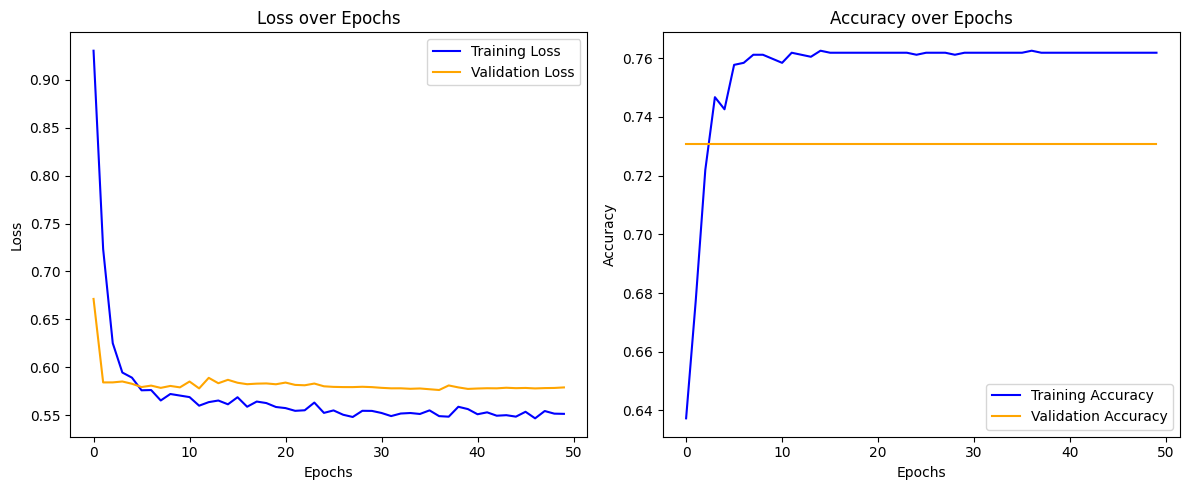

In [18]:
import matplotlib.pyplot as plt

# 학습 결과 시각화
def plot_training_history(history):
    # 손실 그래프
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 정확도 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 함수 호출
plot_training_history(history)


In [20]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from collections import deque

# 모델 로드
base_path = "/home/cho/NAHONLAB_data/"
model = load_model(base_path + "gru_model.h5")

# 시퀀스 관련 설정
SEQUENCE_LENGTH = 10  # 모델 학습 시 사용된 시퀀스 길이
INPUT_SHAPE = (33, 2)  # 입력 데이터의 기본 크기
sequence_buffer = deque(maxlen=SEQUENCE_LENGTH)

# 카메라 초기화
cap = cv2.VideoCapture(0)  # 0번 카메라를 사용 (컴퓨터 기본 카메라)

# 예측 라벨
LABELS = ["정상", "넘어짐"]  # 0: 정상 상태, 1: 넘어짐

def preprocess_frame(frame):
    """
    프레임 전처리 함수. 랜드마크 좌표를 추출하고 크기를 조정합니다.
    """
    # 랜드마크 추출 예시 (실제 구현에서는 사용자의 좌표 추출 로직 필요)
    landmarks = np.random.rand(33, 2)  # 랜덤 값 대체 (랜드마크 추출 코드 필요)
    return landmarks

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("카메라에서 프레임을 읽을 수 없습니다.")
        break

    # 프레임 전처리
    landmarks = preprocess_frame(frame)
    sequence_buffer.append(landmarks)

    # 시퀀스가 충분한 길이일 때 예측 수행
    if len(sequence_buffer) == SEQUENCE_LENGTH:
        # 시퀀스 데이터를 모델 입력 형태로 변환 (Flatten)
        sequence_array = np.array(sequence_buffer).reshape(1, SEQUENCE_LENGTH, 33 * 2)  # (1, 10, 198)

        # 모델 예측
        prediction = model.predict(sequence_array)
        predicted_label = np.argmax(prediction, axis=1)[0]

        # 결과 출력
        label_text = LABELS[predicted_label]
        print(f"예측: {label_text}")

        # 프레임에 결과 표시
        cv2.putText(frame, label_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # 화면에 프레임 출력
    cv2.imshow("Camera", frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 카메라 릴리스 및 창 닫기
cap.release()
cv2.destroyAllWindows()


[ WARN:0@65.205] global cap_v4l.cpp:999 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@65.205] global obsensor_uvc_stream_channel.cpp:158 getStreamChannelGroup Camera index out of range
